# Project 1: Disruption problem
# Students: Khair Mohamed - El Firdoussi Aymane - Msik Ahmed Amine


In [126]:
import numpy as np
import matplotlib.pyplot as plt 

# All imports go here

# Introduction

In this paper, we will introduce stochastic processes in continuous time.  The aim of this study is to introduce a few properties about Poisson processes and to provide the basics to deal with such processes in the case where there is a change of intensity. This a very frequent situation. For example, take a soccer game. Scoring goals during a match soccer can very well approximately characterized by a Poisson process. Imagine that there is no public at the begining and that the fans' arrival follows an exponential law. Our final goal is to predict this point of time by observing the number of goals in the game and detect the moment where the intensity changed.

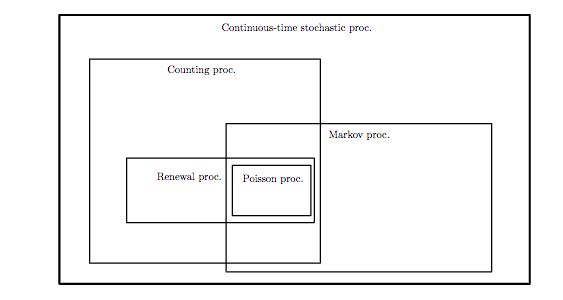

# Preparatory work and Assumptions

Imagine that we have events we describe by a point process 𝑁. At the beginning of the observation, events occur according to a Poisson process of intensity $\lambda_0$ until a time $\tau$, and then switch to a new regime which is still a Poisson process but with intensity $\lambda_1$. We suppose that we know $\lambda_0$ and $\lambda_1$ but not $\tau$. We assume also that $\tau$ follows an exponential distribution of parameter $\sigma$, i.e $\tau \sim \mathcal{E}(\sigma)$. We want to estimate $\tau$ by the observation of a single trajectory.

----
# Question 1:

We define $Z(t) = \mathbb{1}_{ \{\tau \leq t \} }$, and $$ \hat{Z}(t) = \mathbb{E}[Z(t) | \mathcal{F}_t] $$
Where $ \mathcal{F}_t = \sigma(N(s), s \leq t) $

We assume that:

$$ \hat{Z}(t) = \int_0^t h(s)(1 - \hat{Z}(s)) ds + \int_0^t \frac{(\lambda_1 - \lambda_0) \hat{Z}(s)(1 - \hat{Z}(s))}{ \hat{\lambda}(s)} \left( dN(s) -  \hat{\lambda}(s)ds \right) $$


Using the definition of $dN$ (integration with respect to a point process), we can rewrite the above equation as :

$$ \hat{Z}(t) = \int_0^t h(s)(1 - \hat{Z}(s)) ds - \int_0^t (\lambda_1 - \lambda_1)\hat{Z}(s) (1 - \hat{Z}(s)) ds + \sum_{T_n \leq t} \frac{(\lambda_1 - \lambda_0) \hat{Z}(T_n^-) (1 - \hat{Z}(T_n^-))}{\lambda_0 + (\lambda_1 - \lambda_0)\hat{Z}(T_n^-)}$$
Hence, between two jumps of N $[T_n, T_{n + 1}]$, $\hat{Z}(t)$ is obtained by the equation:

$$ \hat{Z}(t) = \hat{Z}(T_n) + \int_{T_n}^t (h(s) - (\lambda_1 - \lambda_0) \hat{Z}(s)) (1 - \hat{Z}(s)) ds $$ 

And in the n-th jump moment $T_n$, there is a discontinuity in $\hat{Z}(t)$ of amplitude:

$$ \hat{Z}(T_n) - \hat{Z}(T_n^-) = \frac{(\lambda_1 - \lambda_0)\hat{Z}(T_n^-)(1 - \hat{Z}(T_n^-))}{\lambda_0 + (\lambda_1 - \lambda_0) \hat{Z}(T_n^-)} $$

----

# Question 2:

Given a discrete process $(\xi_n)_{n \in \mathbb{N}}$ where $\forall n \in \mathbb{N}$ $\xi_n \sim \mathcal{E}(\lambda)$, we can generate a Poisson process of intensity $\lambda$ by defining the arrival times:

\begin{equation}
\begin{array}
& T_0 = 0 \\
T_{n + 1} = T_n + \xi_n
\end{array}
\end{equation}

We define the number of arrivals before time $t \in \mathbb{R}$ by:

$$ N(t) = \sum_{n \in \mathbb{N}^+} \mathbb{1}_{ \{T_n \leq t\} }$$

We will generate poisson processes in this study thanks to this definition. 

In this study, we recall that we consider two independent Poisson processes with respective intensities $\lambda_0$ and $\lambda_1$. Initially, we only observe the first one, and after a random instant $\tau$, independent of the two processes, we observe the second one. This process can be generated using the follwing function called **poisson_process**, which takes in parameters:
- lam0 : which denotes $\lambda_0$
- lam1 : $\lambda_1$
- tau : the time $\tau$

In [169]:
def poisson_process(lam0, lam1, tau):
    # T is the jump times process
    T = [0]
    xi = np.random.exponential(scale = 1 / lam0)
    t = xi
    while t < tau:
        T.append(t)                                          
        t += np.random.exponential(scale = 1 / lam0)
    
    t = tau
    n = len(T)
    for i in range(n):
        t += np.random.exponential(scale = 1 / lam1)
        T.append(t)
    
    return T

In [172]:
# Defining the function N which counts the number of arrivals up to time t
def num_arrivals(T, t):
    return np.sum(np.array(T) <= t)


### Plotting a sample point process

Hence, we are now able to generate a point process modelling our scoring goals problem. One important hypothesis in our model is that the duration of the game is infinite. Not very realistic but in the other case we would have had to take a troncated exponential law for the arrival of the fans and our project aims to study exponential law. Then, lets suppose that in general the intensity of the game is greater when the public is present (with more goals because of the energy of the fans). We can relate the intensity of the game with the instensity of the two poisson processes. For exemple if the game is two times more intense, we use the following visualization.

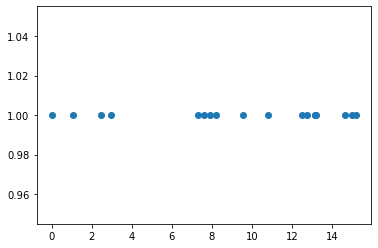

In [175]:
# Parameters
lam0 = 1
lam1 = 2
n = 20
tau_ = 10

T_ = poisson_process(lam0, lam1, tau_)
# Plotting
plt.scatter(T_, np.ones(len(T_)))
plt.show()

For a game of 15 min here where we can observe that the fans came around minute 8 because if the change of frequency in the scoring of goals. This past interpretation is purely hypothetical and our aim is that with point processes like that where we don't know the time of arrival but we do know what law it follows (exponential $\tau$) we could predict very accurately this arrival.

## Plotting a sample path of the Poisson process N

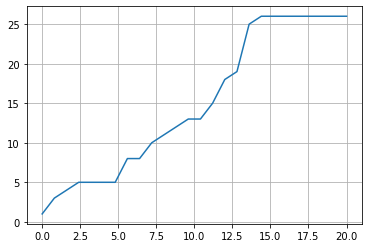

In [193]:
# Parameters
lam0 = 1
lam1 = 2
n = 20
tau_ = 10

# Plotting
T_ = poisson_process(lam0, lam1, tau_)
t = np.linspace(0, 20, len(T_))
N = []
for x in t:
    N.append(num_arrivals(T_, x))
plt.plot(t, N)
plt.grid()
plt.show()

## Simulating a sample trajectory of Z

### Rectangles' method: Newton Cotes of rank 1

If we partition each interval [$T_n, T_{n + 1}$] into $p$ sub-intervals with equal size, then we obtain points $(t_i)_{i = 0}^p$ where $t_{n,0} = T_n$, $t_{n,1} = T_n + \epsilon$, $t_{n,2} = T_n + 2 \epsilon$,...., $t_{n,k} = T_n + k \epsilon$ until $t_{n,p - 1} = T_{n + 1} - \epsilon$, where $ \epsilon = \frac{T_{n + 1} - T_n}{p + 1}$

Then using this, we approximate the integral in the expression of Question 1 with the rectangles method, and we obtain: 
$ \forall k \in \{0, ..., p - 1 \} $

$$ \hat{Z}(t_{n, k+1}) =  \hat{Z}(T_n) + \epsilon \sum_{l = 0}^{k} h(t_{n, l}) (1 - (\lambda_1 - \lambda_0) \hat{Z}(t_{n, l}))(1 - \hat{Z}(t_{n, l})) $$

By developping the calculus, we find the induction relation:

$$ \hat{Z}(t_{n, k+1}) = \hat{Z}(t_{n, k}) + \epsilon h(t_{n, k})(1 - (\lambda_1 - \lambda_0) \hat{Z}(t_{n, k}))(1 - \hat{Z}(t_{n, k})) $$


In [194]:
def generate_Z_hat(T, p, sigma, lam0, lam1):
    n = len(T)
    
    # Z will contain the table of our process
    Z = np.zeros((n, p))
    
    # U will contain the table of instants that we calculated Z^ in
    U = np.zeros((n, p))
    
    # Initialization: row 0
    eps =(T[1] - T[0]) / (p + 1)
    u = T[0]
    U[0, 0] = u
    for j in range(p - 1):
        Z[0, j + 1] = Z[0, j] + eps * (sigma - (lam1 - lam0) * Z[0, j]) * (1 - Z[0, j])
        u += eps
        U[0, j + 1] = u
        
    # Values for t in [T_i, T_{i + 1}[
    for i in range(1, n - 1):
        eps = (T[i + 1] - T[i]) / (p + 1)
        u = T[i]
        U[i, 0] = u
        # computing the initial value with the transition expression (jump size)
        Z[i, 0] = Z[i - 1, p - 1] + ((lam1 - lam0) * Z[i - 1, p - 1] * (1 - Z[i - 1, p - 1])) / (lam0 + (lam1 - lam0) * Z[i - 1, p - 1])
        
        # computing Z[i, j]
        for j in range(p - 1):
            Z[i, j + 1] = Z[i, j] + eps * (sigma - (lam1 - lam0) * Z[i, j]) * (1 - Z[i, j])
            u += eps
            U[i , j + 1] = u
            
    # Last row: beyong the last arrival time, we will just compute the value
    u = T[n - 1] + 1 / lam1
    eps = 1 / (lam1 * (p + 1))
    for j in range(p):
        U[n - 1 , j] = u
        Z[n - 1, j] = Z[n - 2, p - 1] + ((lam1 - lam0) * Z[n - 2, p - 1] * (1 - Z[n - 2, p - 1])) / (lam0 + (lam1 - lam0) * Z[n - 2, p - 1])
        u += eps   
    return Z, U

## Plotting results

In [196]:
# Parameters
p = 200
lam0 = 100
lam1 = 99
sigma = 0.1
tau = np.random.exponential(scale = 1 / sigma)

# Simulating T and Z
T = poisson_process(lam0, lam1, tau)
Z, U = generate_Z_hat(T, p, sigma, lam0, lam1)


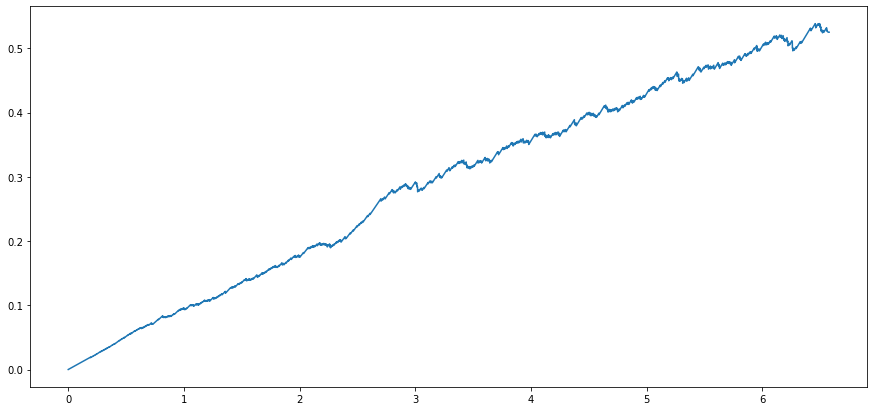

In [197]:
plt.figure(figsize = (15, 7))
Z_flat = Z.reshape(1, -1)[0]
U_flat = U.reshape(1, -1)[0]
z = Z_flat[::100]
u = U_flat[::100]
plt.plot(U_flat, Z_flat)
plt.show()

# Question 3:

## Determining the value of $\tau$ experimentally:
We know that 

In [ ]:
def closest(t, T):
    if t >= T[-1]:
        return len(T) - 1
    
    idx = 0
    while T[idx + 1] < t:
        idx += 1
    return idx   

In [ ]:
# Estimation of tau
def estimation(Z, U, tau, precision=0.99):
    # We will return the value in U for which the proba is close to 1
    n = closest(precision, Z)
    return U[n]

In [184]:
print(tau)

6.019236375970847


In [185]:
print(estimation(Z_flat, U_flat, tau))

16.45303093601147


In [186]:
Z_hat(tau , Z, T, 3)

0.4407540220950496

# Question 3:


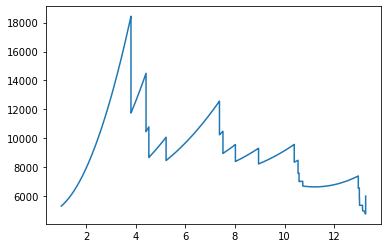

In [187]:
def f(t,T,lam1,lam2):                        
    Nt=poisson(T, t)
    N=len(T)
    return (1-(lam1*t)/Nt)**2+(1-(lam2*(T[-1]-t))/(N-Nt))**2

l=np.linspace(1,T_[-2],200000)
u=[ f(t,T_,lam0,lam1) for t in l]
plt.plot(l,u)
plt.show()

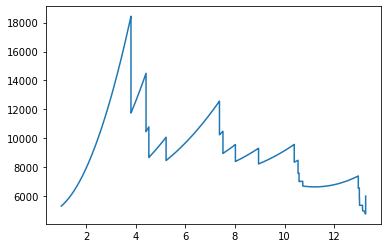

In [188]:
l=np.linspace(1,T_[-2],200000)
u=[ f(t,T_,lam0,lam1) for t in l]
plt.plot(l,u)
plt.show()

In [189]:
print(l[np.argmin(u)])

13.266169622477502


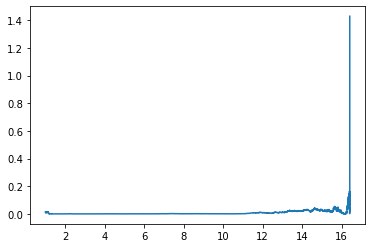

1.2558314026625177


In [190]:
def f(t,T,lam1,lam2):
    Nt=poisson(T, t)
    N=len(T)
    r1=(lam1*t)/Nt
    r2=(lam2*(T[-1]-t))/(N-Nt)
    return (1-(lam1*t)/Nt)**2+(1-(lam2*(T[-1]-t))/(N-Nt))**2 
l=np.linspace(1,T[-2],20000)
u=[ f(t,T,lam0,lam1) for t in l]
plt.plot(l,u)
plt.show()
print(l[np.argmin(u)])

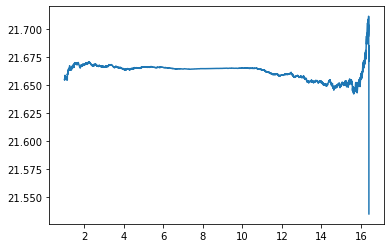

16.41075970436052


In [191]:
def f(t,T,lam1,lam2):
    Nt=poisson(T, t)
    N=len(T)
    r1=(lam1*t)/Nt
    r2=(lam2*(T[-1]-t))/(N-Nt)
    alpha=0.11
    return   alpha*(np.abs(r1-lam1)**(1)+np.abs(r2-lam2)**(1)) 
l=np.linspace(1,T[-2],20000)
u=[ f(t,T,lam0,lam1) for t in l]
plt.plot(l,u)
plt.show()
print(l[np.argmin(u)])

In [192]:
print(f(12.764,T,lam0,lam1))

21.6580216955374


## Remarques:

- Si $\lambda_0$ et $\sigma$ sont très éloignés, alors on n'a pas besoin de beaucoup de points pour estimer $\tau$.

## Question 4

### Law of large nummbers and scoring goals

The idea explored in this part is that the function "generate_Z_hat" generates random variables and we have that:


$$ \hat{Z}(t) = \mathbb{E}[\mathbb{1}_{ \tau \leq t} | \mathcal{F}_t] $$

$$ \mathbb{E}[\hat{Z}(t)] = \mathbb{P}[\tau \leq t] $$ 

A good idea to estimate the expectaty of random variables is to use the law of large numbers. We suppose that we deal with integrable variables. Then we do the Monte-Carlo estimation of this expectation, and we find the time $t$ for which we move from 0 to 1. Why 0 and 1? The fact that the time $\tau$ is already set before the generation of the $\hat{Z}(t)$ we get that the event $ \tau \leq t$ is either of probability 1 or 0. So we will vary the variable t to see where our limit will become 1.

In [22]:
def Z_hat(t, Z, T, p):
    
    # We need to find the T_n such that t is in [T_n, T_{n + 1}]
    n = closest(t, T)
    z = Z[n, 0]
    
    # Computing the integral with the method of rectangles
    eps =(t - T[n]) / p
    for j in range(p - 1):
        z += eps * (sigma - (lam1 - lam0) * z) * (1 - z)
    return z

In [59]:
# The estimator of tau
def tau_estimation(t, n, tau, lam0, lam1, sigma, p, N):
    """ N is the number of all points of the Poisson Process with the second intensity
        n : the integer in the Monte-Carlo estimation
    """
    z_mean = 0
    for i in range(n):
        T = point_process(lam0, lam1, tau, N)
        Z, U = generate_Z_hat(T, p, sigma, lam0, lam1)
        z_mean += Z_hat(t, Z, T, p)
    return z_mean / n

In [ ]:
print(tau)

In [ ]:
# Parameters
#t = 0.3
n = 1000
N = 50
p = 100

# Do we dare ?
#res = tau_estimation(t, n , tau, lam0, lam1, sigma, p, N)
t = np.linspace(0, 30, 10)

values = []
for r in t:
    result = tau_estimation(r, n, tau, lam0, lam1, sigma, p, N)
    values.append(result)
plt.figure(figsize=(12, 7))
plt.plot(t, values)
plt.show()
#print(tau_estimation(t, n , tau, lam0, lam1, sigma, p, N))

In [ ]:
# Parameters
t = 17
n = 1000
N = 50
p = 100

# Do we dare ?
res = tau_estimation(t, n , tau, lam0, lam1, sigma, p, N)
print(res)

### Binary search and the arrival of the public

The intuition here is that if we find the intensity if the two halfs of a game. If the public arrive during the first half, the instensity of the second one is greater so we can predict that the arrival happened during the first one. So we can divide our first half again and do the same calculus to see if the arrival was at the first quarter ot the second. Recursively we will be able to find a close window where they arrived. We will define a point process slightly different that doesn't end when we have a certain amount of goals (the variable n in our function "point_process") but when we hit the 90th minute. 

In [53]:
def point_process_90(lam0, lam1, tau):
    # T is the jump times process
    T = [0]
    xi = np.random.exponential(scale = 1 / lam0)
    t = xi
    while t < tau:
        T.append(t)
        t += np.random.exponential(scale = 1 / lam0)
    t=tau
    while t< 90:
        t += np.random.exponential(scale = 1 / lam1)
        T.append(t)
    
    return T

Thanks to the law of large numbers, we know that as t tends to infinity we have the almost sure convergence $$ \frac{N_t}{t} \rightarrow \lambda.$$We use this formula to infer that if we determine the mean count on different time intervals we can have a estimation of the intensity $\lambda$. However, through our expirementations we have seen that if we only use one point process realisation it doesn't work very well. The binary searsh was often stuck in intervals with no realizations and the $\tau$ was happening after for example. So, we decided to generate many point processes with the same $\tau$ and then compare the mean of their intensities through different intervals to avoid the case scenario with 0 jump in an interval.

In [54]:
# Parameters
lam0 = 0.1
lam1 = 100
sigma_1 = 1/45
tau_1 = np.random.exponential(scale = 1 / sigma_1)
n=1000

T_90_list = []  # List to store the point processes
for i in range(n):
    T_90_i = point_process_90(lam0, lam1, tau_1)
    T_90_list.append(T_90_i)  


In [90]:
def point_process_intensity_interval(a, b, T):
    """
    Parameters:
        T: List of jump times of the point process.
        a: Beginning of the time interval.
        b: End time of the time interval.
    """
    count = 0
    for i in range(len(T)-1):
        if a < T[i] <= b:
            count += 1
    if b > T[-1]:
        count += 1 
    mean = count / (b - a)
    return mean


In [ ]:
epsilon = 20
left = 0
right = 90

while abs(right - left) > epsilon:
    mid = (left + right) / 2
    intensity1=0
    intensity2=0
    for i, T_90_i in enumerate(T_90_list):
        length = len(T_90_i)  
        intensity1 += point_process_intensity_interval(left, mid, T_90_i)
        intensity2 += point_process_intensity_interval(mid, right, T_90_i)
    intensity1 = intensity1/n
    intensity2 = intensity2/n
    if intensity1 < intensity2:
        right = mid
    else:
        left = mid
    
# Final inferred arrival time window
arrival_window = (left, right)
print("Inferred Arrival Time Window:", arrival_window)
print(tau_1)


Even Though, we have taken the mean intensities of many random processes, it doesn't work very well especially when the epsilon is small. We have results that depends a lot on the choice of parameters lam0, lam1, sigma_1. We deduce that binary searsh is not a very good way to estimate $\tau$, probably because we have $$ \frac{N_t}{t} \rightarrow \lambda$$ and in our case it's quiete the opposite with the intervalles times getting smaller and smaller.

In [ ]:

def cusum_change_point_detection(events, threshold):
    n = len(events)
    sums = np.zeros(n)
    sums[0] = max(0, events[0] - threshold)
    
    for i in range(1, n):
        sums[i] = max(0, sums[i-1] + events[i] - threshold)
    
    change_point = np.argmax(sums)
    
    return change_point

# Example usage
events = [10, 12, 15, 20, 30, 25, 18, 10, 5, 10, 12, 14, 20, 25, 30, 35, 40, 35, 30, 25]
threshold = 0
plt.scatter(T_90_1, np.ones(len(T_90_1)))
plt.show()
change_point = cusum_change_point_detection(T_90_1, threshold)
print("Change point:", change_point)